In [10]:
import pandas as pd 

df = pd.read_csv("drugLibTrain_raw_sentiment.tsv", sep = "\t")
df


,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,reviewSentiment
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",-0.2960
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",-0.5719
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,-0.5106
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,0.0000
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,0.0000
...,...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...",0.4359
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,-0.9736
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,0.0000
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,-0.4118


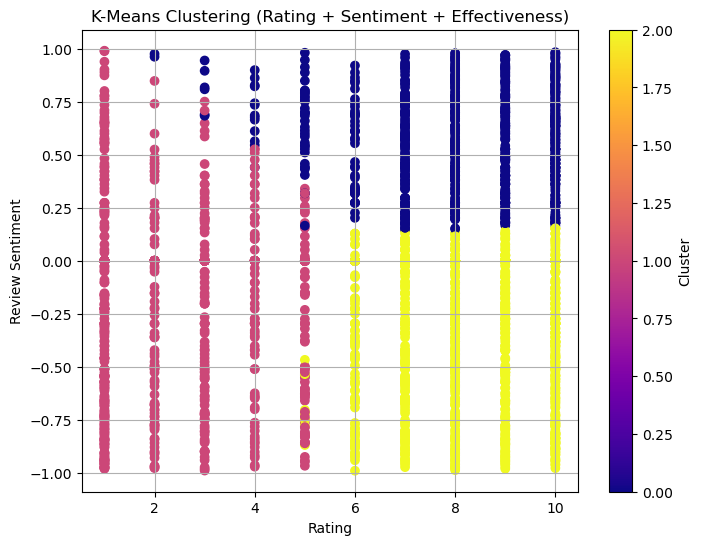

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder

file_path = "drugLibTrain_raw_sentiment.tsv"
df = pd.read_csv(file_path, sep='\t')

# standardizes the data so that we can measure it out from equal distance 
scaler = StandardScaler()
#calculates the mean and std so that we are on the same scale
scaled_features = scaler.fit_transform(df[['rating', 'reviewSentiment']])
#creates a numpy array, if unknown categories appeared they are ignored
encoder = OneHotEncoder(sparse_output =False, handle_unknown='ignore')
effectiveness_encoded = encoder.fit_transform(df[['effectiveness']])
#loads it into one row so that we can better analyze the rating sentiment, and effectiveness based off  onehotencoder
features_combined = np.hstack((scaled_features, effectiveness_encoded))

# Apply KMeans, 30 seed, 10 iterations
kmeans = KMeans(n_clusters=3, random_state=30, n_init=10)
#creates new clusters based off the np.hstack 
df['cluster'] = kmeans.fit_predict(features_combined)

# Plot clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['rating'], df['reviewSentiment'], c=df['cluster'], cmap='plasma')
plt.xlabel('Rating')
plt.ylabel('Review Sentiment')
plt.title('K-Means Clustering (Rating + Sentiment + Effectiveness)')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()

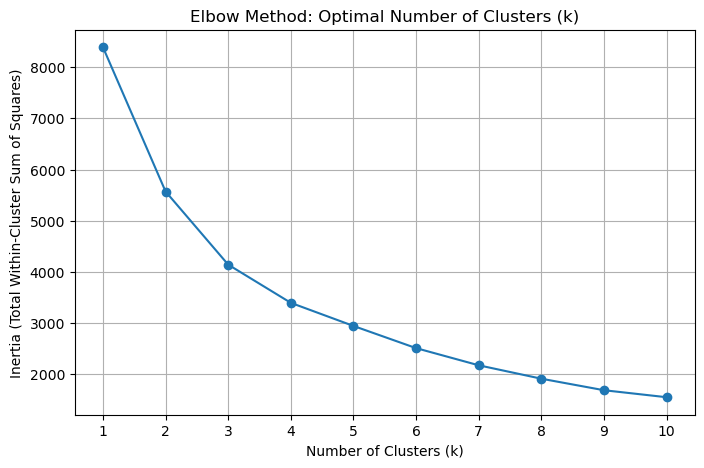

In [38]:
tight = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=30, n_init=10)
    #runs the clustering process
    kmeans.fit(features_combined)
    tight.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Total Within-Cluster Sum of Squares)')
plt.grid(True)
plt.xticks(k_values)
plt.show()
